In [2]:
import pandas as pd

# Load the datasets
github_data = pd.read_csv('github.csv')
stackoverflow_data = pd.read_csv('stackoverflow.csv')

In [3]:
# import pandas as pd
# from __init__ import path
# path()
# from connection.db_connection import get_sqlalchemy_engine

# # Get SQLAlchemy engine and database name
# engine, DB_NAME = get_sqlalchemy_engine()

# # Fetch data from 'github' table
# query_github = "SELECT * FROM github_fetch"
# github_data = pd.read_sql(query_github, engine)

# # Fetch data from 'stackoverflow' table
# query_stackoverflow = "SELECT * FROM stackoverflow_fetch"
# stackoverflow_data = pd.read_sql(query_stackoverflow, engine)


In [4]:
# Display the first few rows of GitHub data
print(github_data.head())

# Display the first few rows of Stack Overflow data
print(stackoverflow_data.head())


        username  followers  following  public_repos  public_gists  hireable  \
0           a1cd          9         33            69             4       NaN   
1  AaronBertrand         48          0            16             0       NaN   
2     aaronchall        113         28            62            13       NaN   
3       abarnert         33          0           112             6       NaN   
4      abdennour        254          6           216            79      10.0   

                                                 bio       location  \
0                                                NaN            NaN   
1  Long-time Microsoft Data Platform MVP, occasio...   Matthews, NC   
2                                                NaN  Manhattan, NY   
3                                                NaN  San Francisco   
4  Former full stack developer, switched to the d...        Tunisia   

            company                 email           created_at  \
0  DARC SIDE | 6502       

In [5]:
# Extracting the username from the githubUrl in Stack Overflow data
stackoverflow_data['username'] = stackoverflow_data['githubUrl'].apply(lambda url: url.split('/')[-1] if isinstance(url, str) else None)


In [6]:
# Perform the join on the 'username' column
merged_data = pd.merge(stackoverflow_data, github_data, on='username', how='inner')


In [7]:
# Display the first few rows of the merged dataset
print(merged_data.head())


   id                                         profileURL  user_id  \
0   1  https://stackoverflow.com/users/100297/martijn...   100297   
1   2    https://stackoverflow.com/users/5133585/sweeper  5133585   
2   3    https://stackoverflow.com/users/22656/jon-skeet    22656   
3   4  https://stackoverflow.com/users/65863/remy-lebeau    65863   
4   5    https://stackoverflow.com/users/45375/mklement0    45375   

                       githubUrl  reputation    reached  answers  questions  \
0   https://github.com/mjpieters     1105781  173600000    19919          3   
1  https://github.com/Sweeper777      254850    7200000     7545        286   
2      https://github.com/jskeet     1481113  412200000    35740         55   
3     https://github.com/rlebeau      585169   34400000    17160          6   
4   https://github.com/mklement0      424730   55000000     8168         24   

   gold_badge_score  silver_badge_score  ...           created_at  \
0               316                4179  

In [8]:
# Select the relevant features
selected_features = ['reputation', 'answers', 'questions', 'gold_badge_score', 
                     'silver_badge_score', 'bronze_badge_score', 'total_stars', 
                     'total_forks', 'total_contributions', 'commit_count', 
                     'pull_request_count', 'issue_count']


In [9]:
# Check for missing values
missing_values = merged_data[selected_features].isnull().sum()
print(missing_values)

reputation             0
answers                0
questions              0
gold_badge_score       0
silver_badge_score     0
bronze_badge_score     0
total_stars            0
total_forks            0
total_contributions    0
commit_count           0
pull_request_count     0
issue_count            0
dtype: int64


In [10]:
# Check the number of rows and columns in the dataframe
rows, columns = merged_data.shape
print(f"The dataframe has {rows} rows and {columns} columns.")


The dataframe has 485 rows and 32 columns.


In [11]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the selected features
scaled_features = scaler.fit_transform(merged_data[selected_features])

# Convert the scaled features back into a DataFrame for easier analysis
scaled_df = pd.DataFrame(scaled_features, columns=selected_features)

# Display the first few rows of the scaled data
print(scaled_df.head())


   reputation   answers  questions  gold_badge_score  silver_badge_score  \
0    4.727826  4.585455  -0.549686          4.266871            6.917494   
1    0.350591  1.278775   1.390876         -0.400147           -0.227867   
2    6.658554  8.813269  -0.193116         13.266413           16.078075   
3    2.049769  3.848173  -0.529114         -0.256792            0.250657   
4    1.224463  1.445258  -0.405686          0.316630            0.608196   

   bronze_badge_score  total_stars  total_forks  total_contributions  \
0            5.381079     0.064736    -0.097640            -0.132915   
1           -0.089680    -0.235206    -0.218873            -0.129722   
2           15.867294     0.071236     0.278821             0.295925   
3            0.740576    -0.240313    -0.221000            -0.389475   
4            0.851276     0.624225     0.017213            -0.167957   

   commit_count  pull_request_count  issue_count  
0      1.404472            0.636776     0.469855  
1      1

In [31]:
from sklearn.cluster import DBSCAN
import pandas as pd

# Initialize DBSCAN (tune eps and min_samples as needed)
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can experiment with these values

# Fit DBSCAN model on the scaled features
dbscan.fit(scaled_df)

# Assign cluster labels to each user (outliers will be labeled as -1)
merged_data['dbscan_cluster'] = dbscan.labels_

# Display the number of users in each cluster (-1 means outliers)
print(merged_data['dbscan_cluster'].value_counts())

# Display the first few rows with the cluster labels
print(merged_data[['username', 'dbscan_cluster']].head())


XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/opt/homebrew/Caskroom/miniconda/base/envs/machinelearning/lib/python3.12/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <B9202094-7D52-318C-99CF-7034B0E9F28D> /opt/homebrew/Caskroom/miniconda/base/envs/machinelearning/lib/python3.12/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/Caskroom/miniconda/base/envs/machinelearning/lib/python3.12/lib-dynload/../../libomp.dylib' (no such file), '/opt/homebrew/Caskroom/miniconda/base/envs/machinelearning/bin/../lib/libomp.dylib' (no such file)"]


In [13]:
# First, select only the numeric columns
numeric_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns

# Then, group by the 'dbscan_cluster' and calculate the mean for the numeric columns
cluster_summary = merged_data.groupby('dbscan_cluster')[numeric_columns].mean()

# Display the cluster summary
print(cluster_summary)

# You can also check the size of each cluster (how many users in each cluster)
print(merged_data['dbscan_cluster'].value_counts())


                        id       user_id     reputation       reached  \
dbscan_cluster                                                          
-1              250.074074  2.219082e+06  216172.061728  2.854918e+07   
 0              331.986486  6.678267e+06   33561.162162  4.472415e+06   
 1              258.333333  4.333801e+06   85682.666667  5.466667e+06   

                    answers  questions  gold_badge_score  silver_badge_score  \
dbscan_cluster                                                                 
-1              3140.535802  96.720988         55.990123          403.577778   
 0               718.108108  15.243243          8.189189           63.540541   
 1              2230.166667   5.666667          9.500000          120.166667   

                bronze_badge_score   followers  ...  public_gists  hireable  \
dbscan_cluster                                  ...                           
-1                      466.217284  408.118519  ...     31.293827      10.0

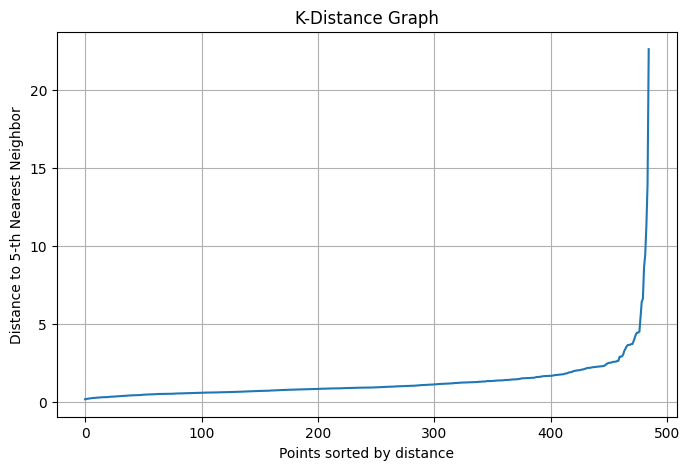

In [14]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# Calculate the distance to the k-th nearest neighbor
k = 5  # You can use the same value as min_samples or adjust as needed
nbrs = NearestNeighbors(n_neighbors=k).fit(scaled_df)
distances, indices = nbrs.kneighbors(scaled_df)

# Sort the distances to plot
distances = np.sort(distances[:, k-1], axis=0)

# Plot the k-distance graph
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title('K-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance to {}-th Nearest Neighbor'.format(k))
plt.grid()
plt.show()


In [15]:
# Adjust the eps value based on your observation from the graph
eps_value = 3  # Set this to your identified value
dbscan = DBSCAN(eps=eps_value, min_samples=3)
dbscan.fit(scaled_df)

# Assign new cluster labels to each user
merged_data['dbscan_cluster'] = dbscan.labels_

# Check the new cluster distribution
print(merged_data['dbscan_cluster'].value_counts())

# Analyze the updated clusters by checking the mean values of features
cluster_summary = merged_data.groupby('dbscan_cluster')[numeric_columns].mean()
print(cluster_summary)


dbscan_cluster
 0    468
-1     14
 1      3
Name: count, dtype: int64
                        id       user_id     reputation       reached  \
dbscan_cluster                                                          
-1              173.357143  8.922276e+05  546770.285714  8.623621e+07   
 0              265.081197  2.972533e+06  176644.617521  2.285079e+07   
 1              304.000000  5.095341e+06   74280.666667  8.233333e+06   

                     answers  questions  gold_badge_score  silver_badge_score  \
dbscan_cluster                                                                  
-1              10517.714286  44.071429        160.000000         1668.142857   
 0               2540.869658  84.854701         44.970085          310.126068   
 1                687.666667   1.666667         17.666667          126.333333   

                bronze_badge_score    followers  ...  public_gists  hireable  \
dbscan_cluster                                   ...                         

In [16]:
# Label suitable candidates based on cluster analysis
merged_data['suitable_candidate'] = merged_data['dbscan_cluster'].apply(
    lambda x: 'Highly Suitable' if x == 0 else 'Less Suitable' if x == 1 else 'Not Suitable'
)

# Display the result
print(merged_data[['username', 'dbscan_cluster', 'suitable_candidate']].head(20))  # Show more rows if needed


            username  dbscan_cluster suitable_candidate
0          mjpieters              -1       Not Suitable
1         Sweeper777               0    Highly Suitable
2             jskeet              -1       Not Suitable
3            rlebeau               0    Highly Suitable
4          mklement0               0    Highly Suitable
5   gabrielemariotti              -1       Not Suitable
6           ghewgill               0    Highly Suitable
7          hashpling               0    Highly Suitable
8      basil-bourque               0    Highly Suitable
9         shepmaster               0    Highly Suitable
10      cirosantilli               0    Highly Suitable
11         tjcrowder              -1       Not Suitable
12            bergus               0    Highly Suitable
13           laurenz               0    Highly Suitable
14            larsks               0    Highly Suitable
15          trekonom               0    Highly Suitable
16         gurustron               0    Highly S

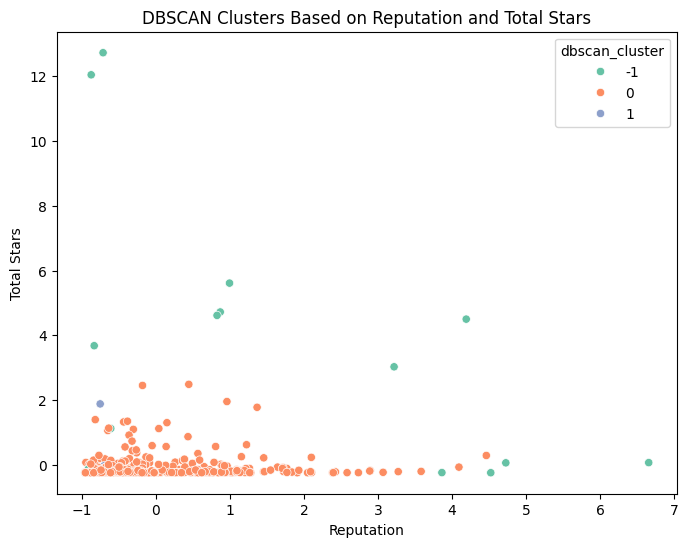

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the clusters using two key features, such as 'reputation' and 'total_stars'
plt.figure(figsize=(8,6))
sns.scatterplot(x=scaled_df['reputation'], y=scaled_df['total_stars'], hue=merged_data['dbscan_cluster'], palette='Set2')
plt.title('DBSCAN Clusters Based on Reputation and Total Stars')
plt.xlabel('Reputation')
plt.ylabel('Total Stars')
plt.show()


In [18]:
merged_data['suitable_candidate_numeric'] = merged_data['suitable_candidate'].apply(
    lambda x: 1 if x == 'Highly Suitable' else 0
)


In [19]:
selected_features = ['reputation', 'answers', 'questions', 'gold_badge_score', 
                     'silver_badge_score', 'bronze_badge_score', 'total_stars', 
                     'total_forks', 'total_contributions', 'commit_count', 
                     'pull_request_count', 'issue_count']

X = merged_data[selected_features]
y = merged_data['suitable_candidate_numeric']  # Target variable


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [22]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.979381443298969
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.98      1.00      0.99        92

    accuracy                           0.98        97
   macro avg       0.99      0.80      0.87        97
weighted avg       0.98      0.98      0.98        97



In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [24]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [25]:
# Make final predictions
final_y_pred = best_model.predict(X_test)

# Evaluate the final model
print("Final Accuracy:", accuracy_score(y_test, final_y_pred))
print(classification_report(y_test, final_y_pred))


Final Accuracy: 0.979381443298969
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.98      1.00      0.99        92

    accuracy                           0.98        97
   macro avg       0.99      0.80      0.87        97
weighted avg       0.98      0.98      0.98        97



In [26]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smote = SMOTE(random_state=42)

# Fit and resample the training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train the model on the resampled data
best_model.fit(X_resampled, y_resampled)

# Make predictions on the test set
final_y_pred = best_model.predict(X_test)

# Evaluate the final model
print("Final Accuracy after SMOTE:", accuracy_score(y_test, final_y_pred))
print(classification_report(y_test, final_y_pred))


Final Accuracy after SMOTE: 0.979381443298969
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.99      0.99      0.99        92

    accuracy                           0.98        97
   macro avg       0.89      0.89      0.89        97
weighted avg       0.98      0.98      0.98        97



In [27]:
importances = best_model.feature_importances_
feature_importances = pd.DataFrame(importances, index=X.columns, columns=["Importance"]).sort_values("Importance", ascending=False)
print(feature_importances)


                     Importance
pull_request_count     0.245010
total_forks            0.218915
total_stars            0.164465
issue_count            0.125111
commit_count           0.078277
answers                0.041810
total_contributions    0.033368
silver_badge_score     0.030116
reputation             0.025125
bronze_badge_score     0.018454
questions              0.012017
gold_badge_score       0.007333


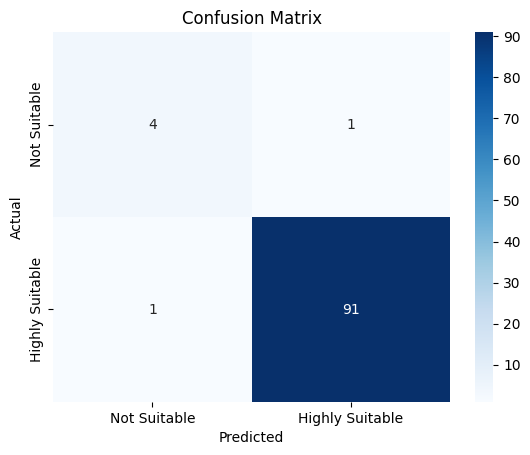

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, final_y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Suitable", "Highly Suitable"], yticklabels=["Not Suitable", "Highly Suitable"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [29]:
# Count the number of candidates in each category
candidate_counts = merged_data['suitable_candidate'].value_counts()

# Display the counts
print(candidate_counts)


suitable_candidate
Highly Suitable    468
Not Suitable        14
Less Suitable        3
Name: count, dtype: int64
